В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [789]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [790]:
cars_df = pd.read_csv('cars.csv')
cars_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [791]:
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [792]:
cars_df.select_dtypes(include=['object'])

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [793]:
for col in cars_df.columns:
    print(col, cars_df[col].nunique())

print("Mileage",cars_df["Mileage"].unique())
print("Brand ",cars_df["Brand"].unique())
print("Year ",cars_df["Year"].unique())
print("Fuel_Type ",cars_df["Fuel_Type"].unique())
print("Transmission  ",cars_df["Transmission"].unique())
print("Owner_Type  ",cars_df["Owner_Type"].unique())
print("Seats  ",cars_df["Seats"].unique())

Car_ID 100
Brand 11
Model 58
Year 6
Kilometers_Driven 18
Fuel_Type 2
Transmission 2
Owner_Type 3
Mileage 15
Engine 36
Power 40
Seats 3
Price 31
Mileage [15 17 10 23 18 20 16 12 19 25 13 24 22 14 21]
Brand  ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Year  [2018 2019 2017 2020 2016 2021]
Fuel_Type  ['Petrol' 'Diesel']
Transmission   ['Manual' 'Automatic']
Owner_Type   ['First' 'Second' 'Third']
Seats   [5 4 7]


В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні Fuel_Type, Transmission
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку: Brand, Model  
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large): Year, Kilometers_Driven, Mileage, Engine, Power,  Price 

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [794]:
X_train, X_test, y_train, y_test = train_test_split(cars_df.drop(columns=['Price']), cars_df['Price'], test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

<Axes: xlabel='Fuel_Type', ylabel='count'>

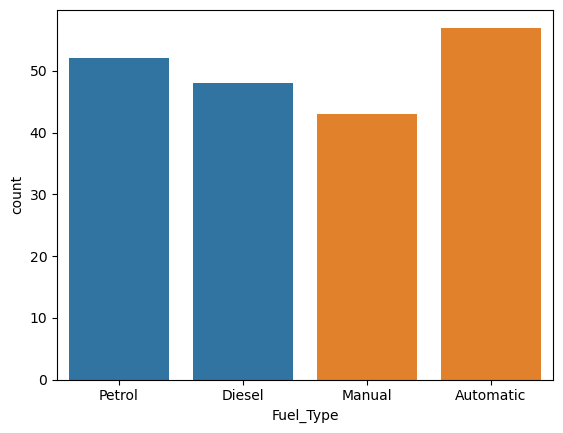

In [795]:
sns.countplot(data=cars_df, x='Fuel_Type')
sns.countplot(data=cars_df, x='Transmission')


In [796]:
fuel_codes = {'Diesel': 0, 'Petrol': 1}
cars_df['fuel'] = cars_df['Fuel_Type'].map(fuel_codes)
trans_codes = {'Automatic': 0, 'Manual': 1}
cars_df['transmission'] = cars_df['Transmission'].map(trans_codes)
cars_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel,transmission
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,1,1
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,1,0
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,1,0
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,0,1
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,0,0


In [797]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])


from sklearn import preprocessing
enc =  OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

one_hot_train = enc.transform(X_train[['Brand']]).toarray()
one_hot_test = enc.transform(X_test[['Brand']]).toarray()

X_train[enc.categories_[0]]=one_hot_train
X_test[enc.categories_[0]]=one_hot_test

Очікуваний результат після трансформацій:

In [798]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

In [799]:
def categorize_model(model):
    sedans = ['Corolla','Civic','City','Verna','Elantra','A3','A4','A5','3 Series','5 Series','7 Series']
    suvs   = ['Creta','Harrier','Tiguan','Fortuner','Scorpio','Thar','X1','X3','X5','GLC','GLE','GLA','T-Roc','WR-V','BR-V','EcoSport','XUV300','Venue']
    hatchbacks = ['Swift','Figo','Polo','Tiago','Santro','Ameo','Altroz']
    others = ['Endeavour','Ranger','Innova','Innova Crysta','Safari','Aspire','Vitara','Camry']
    
    if model in sedans:
        return 'Sedan'
    elif model in suvs:
        return 'SUV'
    elif model in hatchbacks:
        return 'Hatchback'
    else:
        return 'Other'

X_train['Model_Group'] = X_train['Model'].apply(categorize_model)
X_test['Model_Group']  = X_test['Model'].apply(categorize_model)

ordenc = OrdinalEncoder(categories=[X_train["Model_Group"].unique()]) 
ordenc.fit(X_train[['Model_Group']])

# X_train['Model_Group_Codes'] = ordenc.transform(X_train[['Model_Group']])
#
# X_test['Model_Group_Codes'] = ordenc.transform(X_test[['Model_Group']])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute.","[array(['SUV',... dtype=object)]"
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'use_encoded_value'}, default='error'When set to 'error' an error will be raised in case an unknowncategorical feature is present during transform. When set to'use_encoded_value', the encoded value of unknown categories will beset to the value given for the parameter `unknown_value`. In:meth:`inverse_transform`, an unknown category will be denoted as None... versionadded:: 0.24",'error'
,"unknown_value unknown_value: int or np.nan, default=NoneWhen the parameter handle_unknown is set to 'use_encoded_value', thisparameter is required and will set the encoded value of unknowncategories. It has to be distinct from the values used to encode any ofthe categories in `fit`. If set to np.nan, the `dtype` parameter mustbe a float dtype... versionadded:: 0.24",None
,"encoded_missing_value encoded_missing_value: int or np.nan, default=np.nanEncoded value of missing categories. If set to `np.nan`, then the `dtype`parameter must be a float dtype... versionadded:: 1.1",nan
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.3 Read more in the :ref:`User Guide `.",None
,"max_categories max_categories: int, default=NoneSpecifies an upper limit to the number of output categories for each inputfeature when considering infrequent categories. If there are infrequentcategories, `max_categories` includes the category representing theinfrequent categories along with the frequent categories. If `None`,there is no limit to the number of output features.`max_categories` do **not** take into account missing or unknowncategories. Setting `unknown_value` or `encoded_missing_value` to aninteger will increase the number of unique integer codes by one each.This can result in up to `max_categories + 2` integer codes... versionadded:: 1.3 Read more in the :ref:`User Guide `.",None


Чат джпт допоміг, але зараз хоч бачу як робиться категоризація.

-- вже після здачі дз бачу що переплута ордінал із ван хот і інкодером, але залишу це тут

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

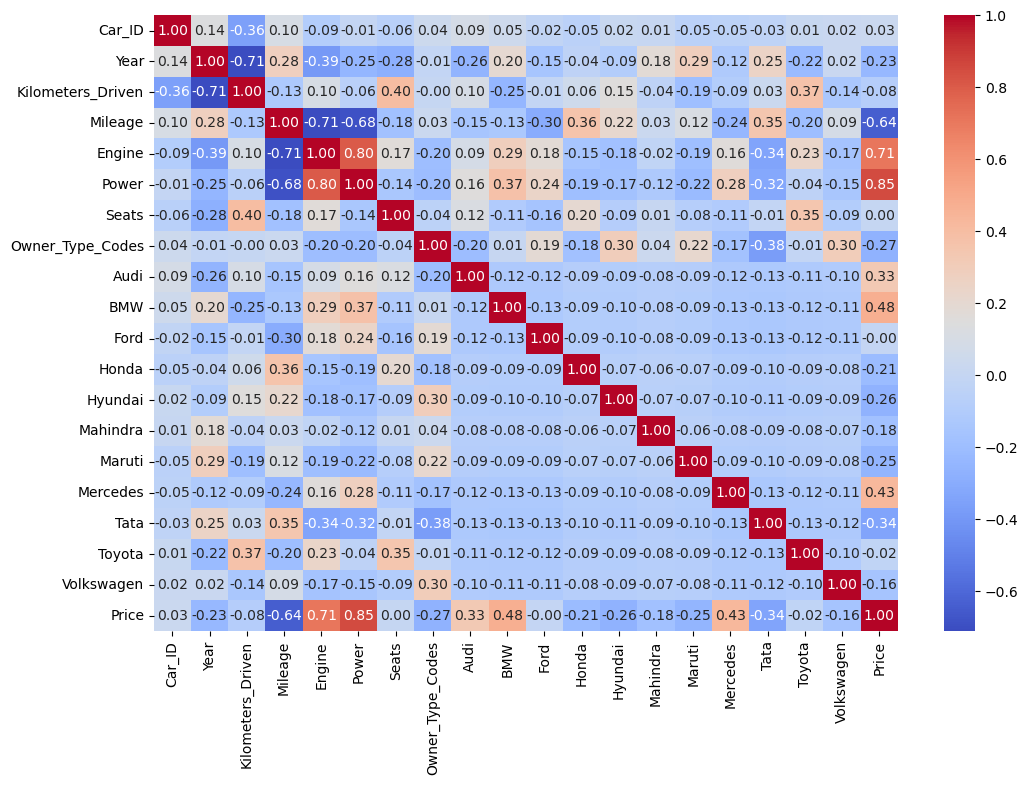

In [800]:

cor_data =pd.concat([X_train.select_dtypes(include='number'), y_train], axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(cor_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Найбільше корелюють із ціною Mielage 0.64, Engine 0.71, Power 0.85

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [801]:
X_train.drop(columns=[ 'Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Model_Group'], inplace=True)
X_test.drop(columns=[ 'Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Model_Group'], inplace=True)
X_train.head()


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Owner_Type_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,2019,22000,18,1498,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,2018,28000,17,1968,187,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,2018,28000,15,1984,241,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,2017,32000,18,1598,103,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,2017,26000,12,1991,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [802]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
prediction_train = lin_reg.predict(X_train)
prediction_test = lin_reg.predict(X_test)

rmse_train= np.sqrt(np.mean((y_train - prediction_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test - prediction_test) ** 2))
print("RMSE на тренувальних даних: ", rmse_train)
print("RMSE на тестових даних: ", rmse_test)
print(lin_reg.coef_,lin_reg.intercept_)

RMSE на тренувальних даних:  252657.27724736798
RMSE на тестових даних:  248249.61361453976
[ 3.67630735e+02  2.64519308e+04  6.83864362e-01 -8.30830816e+03
  1.44374600e+02  5.65242013e+03  1.03951201e+05 -7.56432427e+04
  8.02157521e+05  9.05362938e+05 -2.45355353e+05 -4.14046781e+05
 -4.38882661e+05 -4.95171050e+05 -4.06459207e+05  9.16482144e+05
 -4.26494761e+05 -9.52171736e+04 -1.02375617e+05] -53396745.17833106


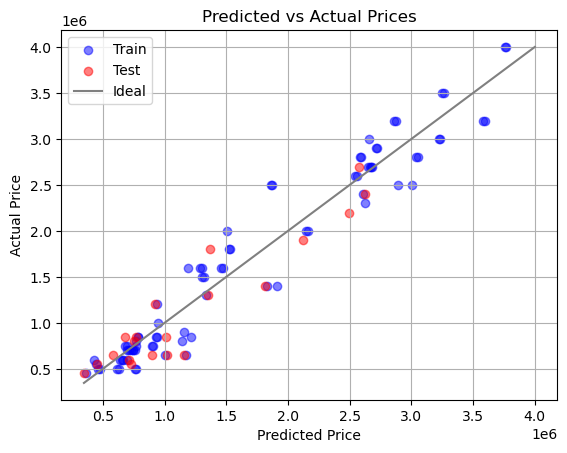

In [803]:
plt.scatter(prediction_train, y_train, color='blue', alpha=0.5, label='Train')
plt.scatter(prediction_test, y_test, color='red', alpha=0.5, label='Test')
max_val = max(max(y_train), max(y_test), max(prediction_train), max(prediction_test))
min_val = min(min(y_train), min(y_test), min(prediction_train), min(prediction_test))
plt.plot([min_val, max_val], [min_val, max_val], color='grey',  label='Ideal')

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.grid(True)
plt.show()

точки передбачення наближені до діагоналі, але не надто ідеальні, розкидані так само як і точки тренувального сету

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [804]:
from sklearn.preprocessing import StandardScaler


In [805]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)


lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
prediction_train = lin_reg.predict(X_train_scaled)
prediction_test = lin_reg.predict(X_test_scaled)

rmse_train= np.sqrt(np.mean((y_train - prediction_train) ** 2))
rmse_test = np.sqrt(np.mean((y_test - prediction_test) ** 2))
print("RMSE на тренувальних даних: ", rmse_train)
print("RMSE на тестових даних: ", rmse_test)
print(lin_reg.coef_,lin_reg.intercept_)

RMSE на тренувальних даних:  252657.27724736693
RMSE на тестових даних:  248249.61361453356
[  10391.90125745   29646.15709637    6270.74511673  -28338.02265813
   94812.49297305  460238.56312752   77048.45924737  -49458.18760015
  219326.97301128  263621.15155565  -99983.52344346 -117427.49757468
 -134316.48739484 -123408.8551895  -115590.83837995  267134.60511687
 -164553.28721448  -49885.43545893  -49009.22222738] 1679999.9999999986


In [806]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lin_reg.coef_
})

# Сортуємо за абсолютною величиною, щоб побачити найвпливовіші
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df.head(20).round(2))  # 20 найсильніших ознак

              Feature  Coefficient  Abs_Coefficient
5               Power    460238.56        460238.56
15           Mercedes    267134.61        267134.61
9                 BMW    263621.15        263621.15
8                Audi    219326.97        219326.97
16               Tata   -164553.29        164553.29
12            Hyundai   -134316.49        134316.49
13           Mahindra   -123408.86        123408.86
11              Honda   -117427.50        117427.50
14             Maruti   -115590.84        115590.84
10               Ford    -99983.52         99983.52
4              Engine     94812.49         94812.49
6               Seats     77048.46         77048.46
17             Toyota    -49885.44         49885.44
7    Owner_Type_Codes    -49458.19         49458.19
18         Volkswagen    -49009.22         49009.22
1                Year     29646.16         29646.16
3             Mileage    -28338.02         28338.02
0              Car_ID     10391.90         10391.90
2   Kilomete

Oзнаки логічно впливають на ціну, наприклад Power чим більша тим більша ціна,Owner_Type_Codes  чим більше власників було тим менша ціна.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [807]:
X = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train.values, X)
results = model.fit()

In [808]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     53.36
Date:                Sat, 31 Jan 2026   Prob (F-statistic):           1.60e-30
Time:                        15:50:07   Log-Likelihood:                -1108.7
No. Observations:                  80   AIC:                             2255.
Df Residuals:                      61   BIC:                             2301.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   3.23e+04     51.933      0.000    1.62e+06    1.74e+06
Car_ID             1.039e+04   3.85e+04      0.270      0.788   -6.65e+04    8.73e+04
Year               2.965e+04   7.11e+04      0.417      0.678   -1.12e+05    1.72e+05
Kilometers_Driven  6270.7451   6.99e+04      0.090      0.929   -1.34e+05    1.46e+05
Mileage           -2.834e+04   6.35e+04     -0.446      0.657   -1.55e+05    9.86e+04
Engine             9.481e+04   7.94e+04      1.193      0.237   -6.41e+04    2.54e+05
Power              4.602e+05   7.86e+04      5.859      0.000    3.03e+05    6.17e+05
Seats              7.705e+04   4.53e+04      1.699      0.094   -1.36e+04    1.68e+05
Owner_Type_Codes  -4.946e+04   4.85e+04     -1.020      0.312   -1.46e+05    4.75e+04
Audi               2.193e+05   3.45e+04      6.360      0.000     1.5e+05    2.88e+05
BMW                2.636e+05   3.52e+04      7.493      0.000    1.93e+05    3.34e+05
Ford              -9.998e+04   3.61e+04     -2.769      0.007   -1.72e+05   -2.78e+04
Honda             -1.174e+05   3.86e+04     -3.042      0.003   -1.95e+05   -4.02e+04
Hyundai           -1.343e+05   3.39e+04     -3.966      0.000   -2.02e+05   -6.66e+04
Mahindra          -1.234e+05   3.33e+04     -3.706      0.000    -1.9e+05   -5.68e+04
Maruti            -1.156e+05   3.44e+04     -3.362      0.001   -1.84e+05   -4.68e+04
Mercedes           2.671e+05   3.47e+04      7.698      0.000    1.98e+05    3.37e+05
Tata              -1.646e+05   4.05e+04     -4.060      0.000   -2.46e+05   -8.35e+04
Toyota            -4.989e+04   3.69e+04     -1.353      0.181   -1.24e+05    2.38e+04
Volkswagen        -4.901e+04   3.36e+04     -1.459      0.150   -1.16e+05    1.81e+04
==============================================================================
Omnibus:                        0.059   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.171
Skew:                           0.059   Prob(JB):                        0.918
Kurtosis:                       2.807   Cond. No.                     8.22e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.05e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Ознаки Power, Brand_Codes, Model_Group_Codes є статистично значущими

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [809]:
X = sm.add_constant(X_train.loc[:,results.pvalues[results.pvalues < 0.05].index.drop('const')])
model = sm.OLS(y_train,X)
results_9 = model.fit()
results_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     87.23
Date:                Sat, 31 Jan 2026   Prob (F-statistic):           4.08e-35
Time:                        15:50:07   Log-Likelihood:                -1116.9
No. Observations:                  80   AIC:                             2256.
Df Residuals:                      69   BIC:                             2282.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.019e+05   1.14e+05      3.528      0.001    1.75e+05    6.29e+05
Power       6913.9993    580.010     11.920      0.000    5756.910    8071.088
Audi         8.79e+05   1.37e+05      6.428      0.000    6.06e+05    1.15e+06
BMW         9.217e+05   1.42e+05      6.497      0.000    6.39e+05     1.2e+06
Ford       -2.693e+05   1.35e+05     -1.995      0.050   -5.39e+05     -34.115
Honda      -2.975e+05   1.57e+05     -1.894      0.062   -6.11e+05    1.59e+04
Hyundai    -4.927e+05   1.46e+05     -3.367      0.001   -7.85e+05   -2.01e+05
Mahindra   -3.911e+05    1.7e+05     -2.301      0.024    -7.3e+05   -5.21e+04
Maruti     -3.939e+05   1.58e+05     -2.494      0.015   -7.09e+05   -7.88e+04
Mercedes    9.336e+05   1.37e+05      6.820      0.000     6.6e+05    1.21e+06
Tata       -3.386e+05   1.26e+05     -2.692      0.009   -5.89e+05   -8.77e+04
==============================================================================
Omnibus:                       12.066   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.138
Skew:                           0.738   Prob(JB):                     0.000851
Kurtosis:                       4.436   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Показники змінилися але не сильно

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [810]:
col_p_025 = results.pvalues[results.pvalues > 0.25].index
col_p_025

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Owner_Type_Codes'], dtype='object')

In [811]:
X = sm.add_constant(X_train.loc[:,results.pvalues[results.pvalues < 0.25].index.drop('const')])
model = sm.OLS(y_train, X)
results_10 = model.fit()
results_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     77.35
Date:                Sat, 31 Jan 2026   Prob (F-statistic):           1.05e-34
Time:                        15:50:07   Log-Likelihood:                -1109.9
No. Observations:                  80   AIC:                             2248.
Df Residuals:                      66   BIC:                             2281.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.831e+05   2.57e+05     -0.713      0.478   -6.96e+05    3.29e+05
Engine       146.9996    100.320      1.465      0.148     -53.296     347.295
Power       5954.0370    870.712      6.838      0.000    4215.604    7692.470
Seats       1.008e+05    5.3e+04      1.902      0.061   -4989.508    2.07e+05
Audi        8.012e+05    1.1e+05      7.314      0.000    5.83e+05    1.02e+06
BMW         8.861e+05   1.09e+05      8.103      0.000    6.68e+05     1.1e+06
Ford       -2.949e+05   1.01e+05     -2.930      0.005   -4.96e+05   -9.39e+04
Honda       -4.18e+05    1.3e+05     -3.204      0.002   -6.79e+05   -1.58e+05
Hyundai    -5.175e+05   1.11e+05     -4.658      0.000   -7.39e+05   -2.96e+05
Mahindra   -4.856e+05   1.36e+05     -3.581      0.001   -7.56e+05   -2.15e+05
Maruti     -4.281e+05   1.22e+05     -3.502      0.001   -6.72e+05   -1.84e+05
Mercedes    9.112e+05   1.04e+05      8.750      0.000    7.03e+05    1.12e+06
Tata        -3.77e+05   9.35e+04     -4.031      0.000   -5.64e+05    -1.9e+05
Toyota       -9.9e+04   1.18e+05     -0.842      0.403   -3.34e+05    1.36e+05
Volkswagen -1.615e+05   1.03e+05     -1.566      0.122   -3.67e+05    4.44e+04
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.420
Skew:                           0.102   Prob(JB):                        0.811
Kurtosis:                       2.709   Cond. No.                     3.08e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.46e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Проаналізувавши показники моделей я б обрала першу модель так як R-squared найбльш наюлижене до 1 і якщо порівнювати її з показниками другої моделі то АІС і ВІС кращі в першої моделі. Третя модель має гарні показники Ф статистики і АІС і ВІС але дуже низький R-squared


----- Вже після здачі ДЗ зрозуміла  що я не додавала стовпець одиниць в татсмодел і воно не правиьно рахувало, тому цього разу третя модель вже має R-squared не 0.236 а 0.938. Зараз я б обирала між першою та третьою моделями, але більше схиляюся до третьою так як там краще показники Ф статистики, АІС і ВІС, хоч R-squared на 0.002 нижчий